In [ ]:
pip install kaggle

In [4]:
pip install tensorflow

In [10]:
pip install matplotlib

In [1]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"arkhipovg","key":"22b87d7710df7cd3182cc9477a99b39d"}'}

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d yaswanthgali/dog-images

 99% 745M/750M [00:11<00:00, 59.5MB/s]
100% 750M/750M [00:11<00:00, 67.6MB/s]


In [16]:
!unzip dog-images.zip

Выходные данные были обрезаны до нескольких последних строк (5000).
  inflating: images/images/n02108089-boxer/n02108089_11687.jpg  
  inflating: images/images/n02108089-boxer/n02108089_117.jpg  
  inflating: images/images/n02108089-boxer/n02108089_11807.jpg  
  inflating: images/images/n02108089-boxer/n02108089_11875.jpg  
  inflating: images/images/n02108089-boxer/n02108089_122.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12232.jpg  
  inflating: images/images/n02108089-boxer/n02108089_125.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12738.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12739.jpg  
  inflating: images/images/n02108089-boxer/n02108089_12827.jpg  
  inflating: images/images/n02108089-boxer/n02108089_13340.jpg  
  inflating: images/images/n02108089-boxer/n02108089_13526.jpg  
  inflating: images/images/n02108089-boxer/n02108089_1353.jpg  
  inflating: images/images/n02108089-boxer/n02108089_1355.jpg  
  inflating: images/images/n02

In [76]:
import numpy as np
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import random
import os

In [97]:
from scipy.ndimage import rotate
def rotate_image_30_degrees(image):
  return rotate(image, 30, reshape=False, mode='nearest')



In [86]:
def vertical_flip(image):
  return rotate(image, 180, reshape=False, mode='nearest')

In [96]:
import cv2

def flip_image(image, mode='horizontal'):

    if mode == 'horizontal':
        # Flip the image horizontally
        flipped_image = cv2.flip(image, 1)
    elif mode == 'vertical':
        # Flip the image vertically
        flipped_image = cv2.flip(image, 0)
    else:
        raise ValueError("Invalid mode. Mode must be 'horizontal' or 'vertical'.")

    return flipped_image


In [98]:
from PIL import ImageEnhance, Image
import numpy as np

def adjust_contrast(image):
   # Convert the image to PIL format
   pil_img = Image.fromarray((image * 255).astype(np.uint8))
   # Enhance the contrast
   contrast = ImageEnhance.Contrast(pil_img)
   pil_img_enhanced = contrast.enhance(2.0)  # Adjust 2.0 for desired contrast
   # Convert back to numpy array
   return np.array(pil_img_enhanced) / 255.0

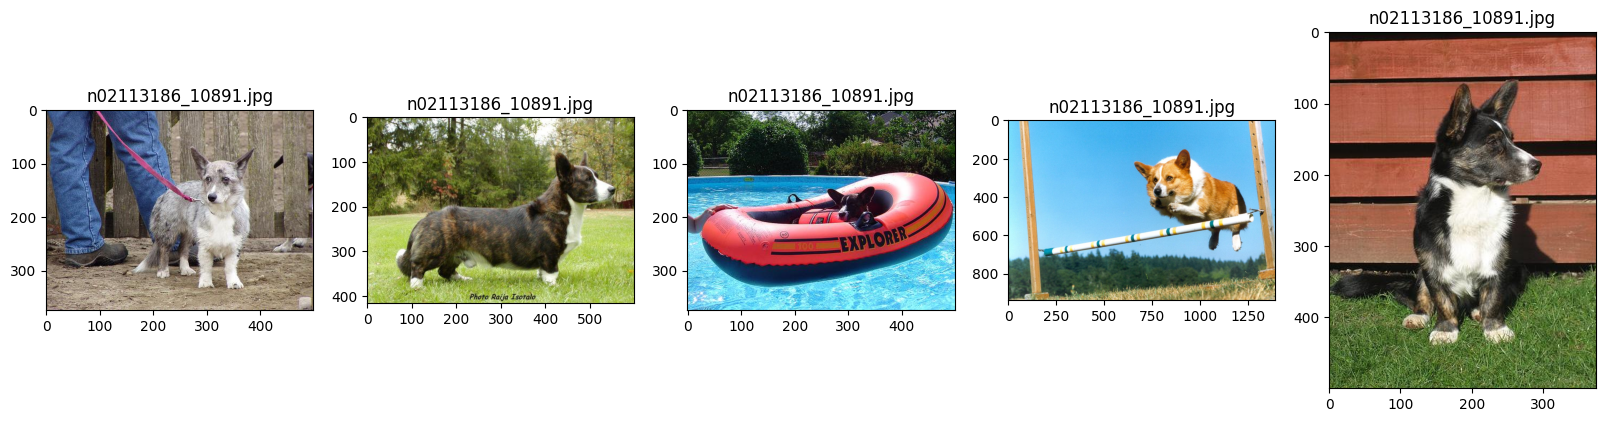

In [79]:
list_img = []
plt.figure(figsize=(20,20))
for i in range(5):
    file = random.choice(os.listdir('images/images/n02113186-Cardigan/'))
    image_path= os.path.join('images/images/n02113186-Cardigan/', file)
    img=mpimg.imread(image_path)
    list_img.append(img)

for i, img in enumerate(list_img):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

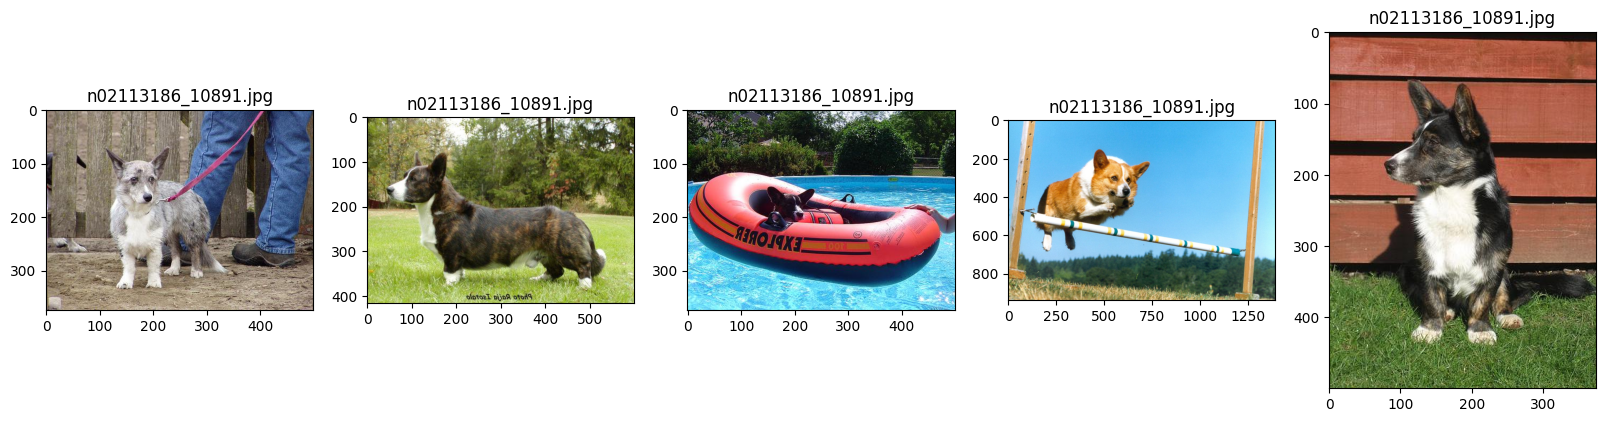

In [95]:
horizontal_flip_list = []
plt.figure(figsize=(20,20))
for img in list_img:
  horizontal_flip_list.append(flip_image(img, mode='horizontal'))

for i, img in enumerate(horizontal_flip_list):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

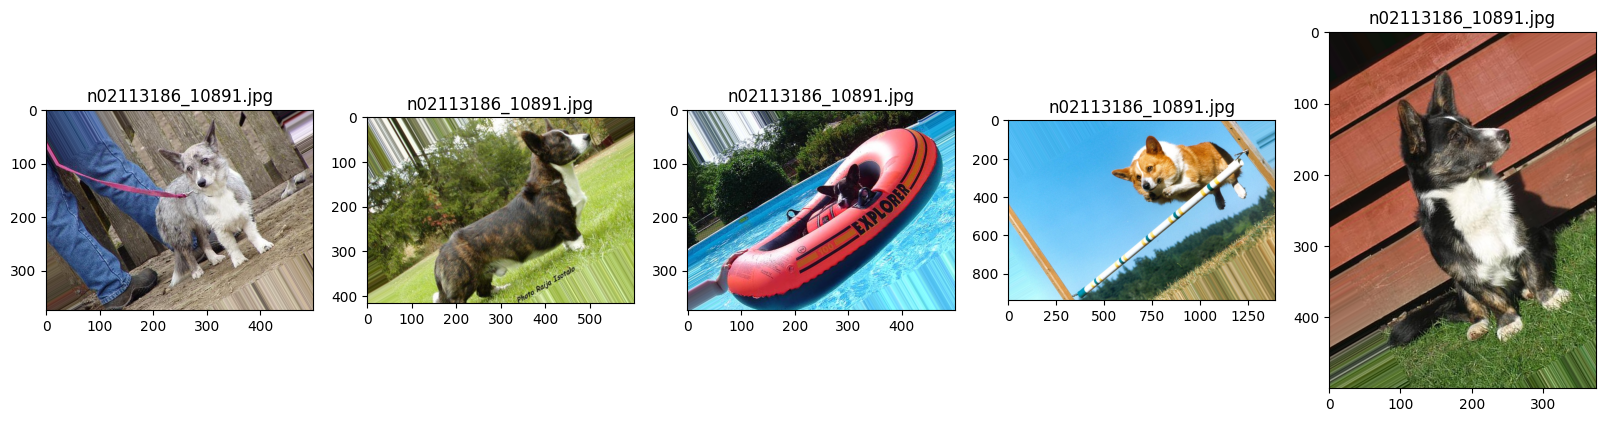

In [88]:
rotated_list = []
plt.figure(figsize=(20,20))
for img in list_img:
  rotated_list.append(rotate_image_30_degrees(img))

for i, img in enumerate(rotated_list):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

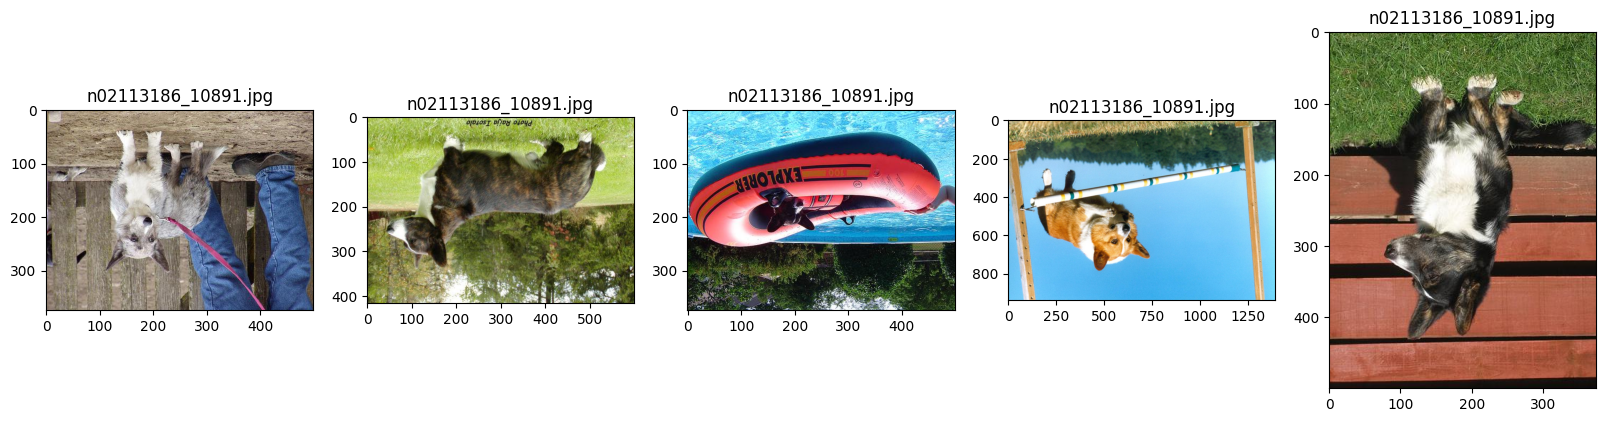

In [87]:
vertical_flip_list = []
plt.figure(figsize=(20,20))
for img in list_img:
  vertical_flip_list.append(vertical_flip(img))

for i, img in enumerate(vertical_flip_list):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)

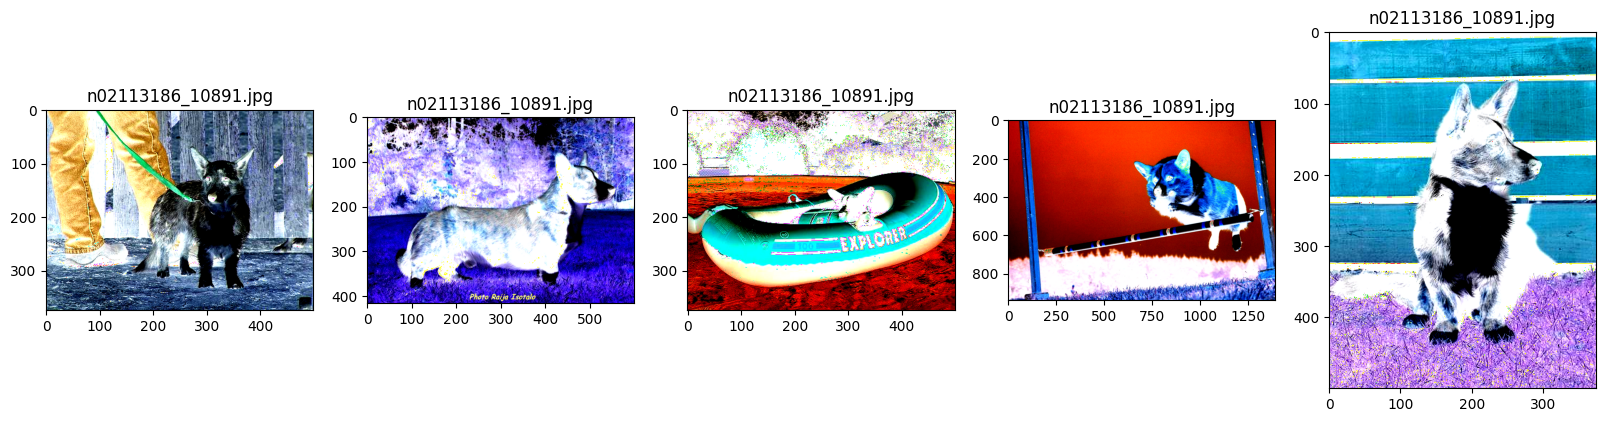

In [99]:
contrast_list = []
plt.figure(figsize=(20,20))
for img in list_img:
  contrast_list.append(adjust_contrast(img))

for i, img in enumerate(contrast_list):
    ax=plt.subplot(3,5,i+1)
    ax.title.set_text(file)
    plt.imshow(img)